Philippe Joly 2025-10-29

# 1 Hz Data Overview

This notebook is just to get a view of what the 1Hz data look like

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [30]:
fns = {
    65536:'/scratch/philj0ly/vis_plasma2/all_ant_4bit_1721361671_2048_65536_5_0_119.npz',
    32768: '/scratch/philj0ly/vis_plasma2/all_ant_4bit_1721361671_2048_32768_10_0_119.npz',
    16384: '/scratch/philj0ly/vis_plasma2/all_ant_4bit_1721361671_2048_16384_20_0_119.npz'
}

t0 = 1721361671
df_record = 125e6/2048 # (Hz) frequency range / # of channels
t_tot = 300 #s

data = []
freqs = []
times = []
for i in fns:
    with np.load(fns[i]) as f:
        dat = f['data']
        spectrum = np.ma.MaskedArray(data=dat, mask=f['mask'])
        N = spectrum.shape[-1]
        data.append(np.abs(spectrum[0,0]+spectrum[1,1]))
    
        freqs.append(f['chans']*df_record/i)
        times.append((0.5 + np.arange(N))*t_tot/N) 

##  Data Visualisation

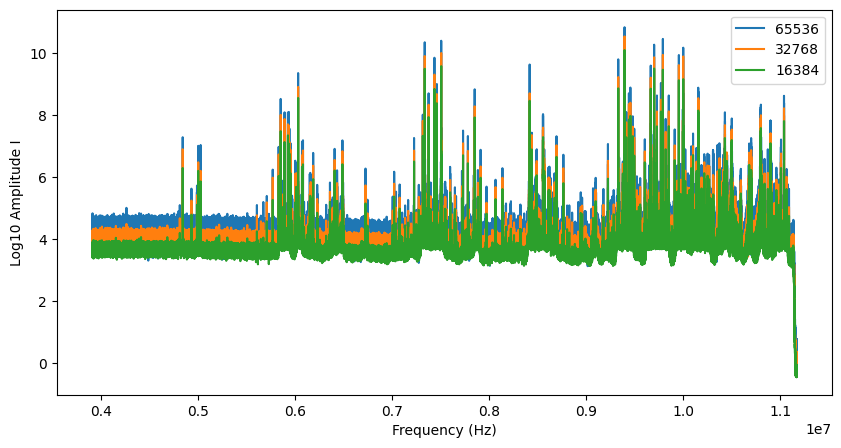

In [38]:
t = 10

plt.figure(figsize=(10,5))

for i, osamp in enumerate(list(fns.keys())):
    plt.plot(freqs[i], np.log10(data[i][:,t]), label=osamp)


# plt.ylim(0,5)
dx = 61
x0 = 4.32e6
# plt.xlim(x0,x0+dx)
plt.xlabel('Frequency (Hz)')   
plt.ylabel('Log10 Amplitude I')
plt.legend()

plt.show()

[(3276800, 3342336), (1638400, 1671168), (819200, 835584)]


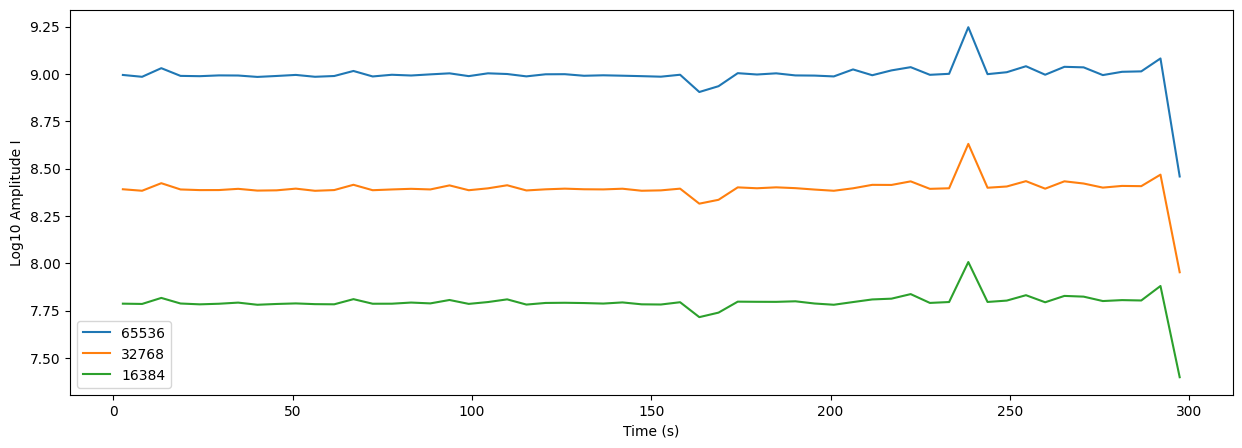

In [39]:
f = 100000

freq_bin = 50
f_ranges = [(osamp*freq_bin, osamp*(freq_bin+1)) for osamp in fns ]
print(f_ranges)

plt.figure(figsize=(15,5))   
for i, osamp in enumerate(list(fns.keys())):
    plt.plot(times[i], np.log10(np.sum(data[i][f_ranges[i][0]:f_ranges[i][1]], axis=0)), label=osamp)

plt.xlabel('Time (s)')   
plt.ylabel('Log10 Amplitude I')
plt.legend()

plt.show()